In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Work/jlProjects/NeutronStars/TOVSolvers.jl`


In [2]:
using DifferentialEquations
using CairoMakie
using LinearAlgebra
using LaTeXStrings

# Naive numerical solution

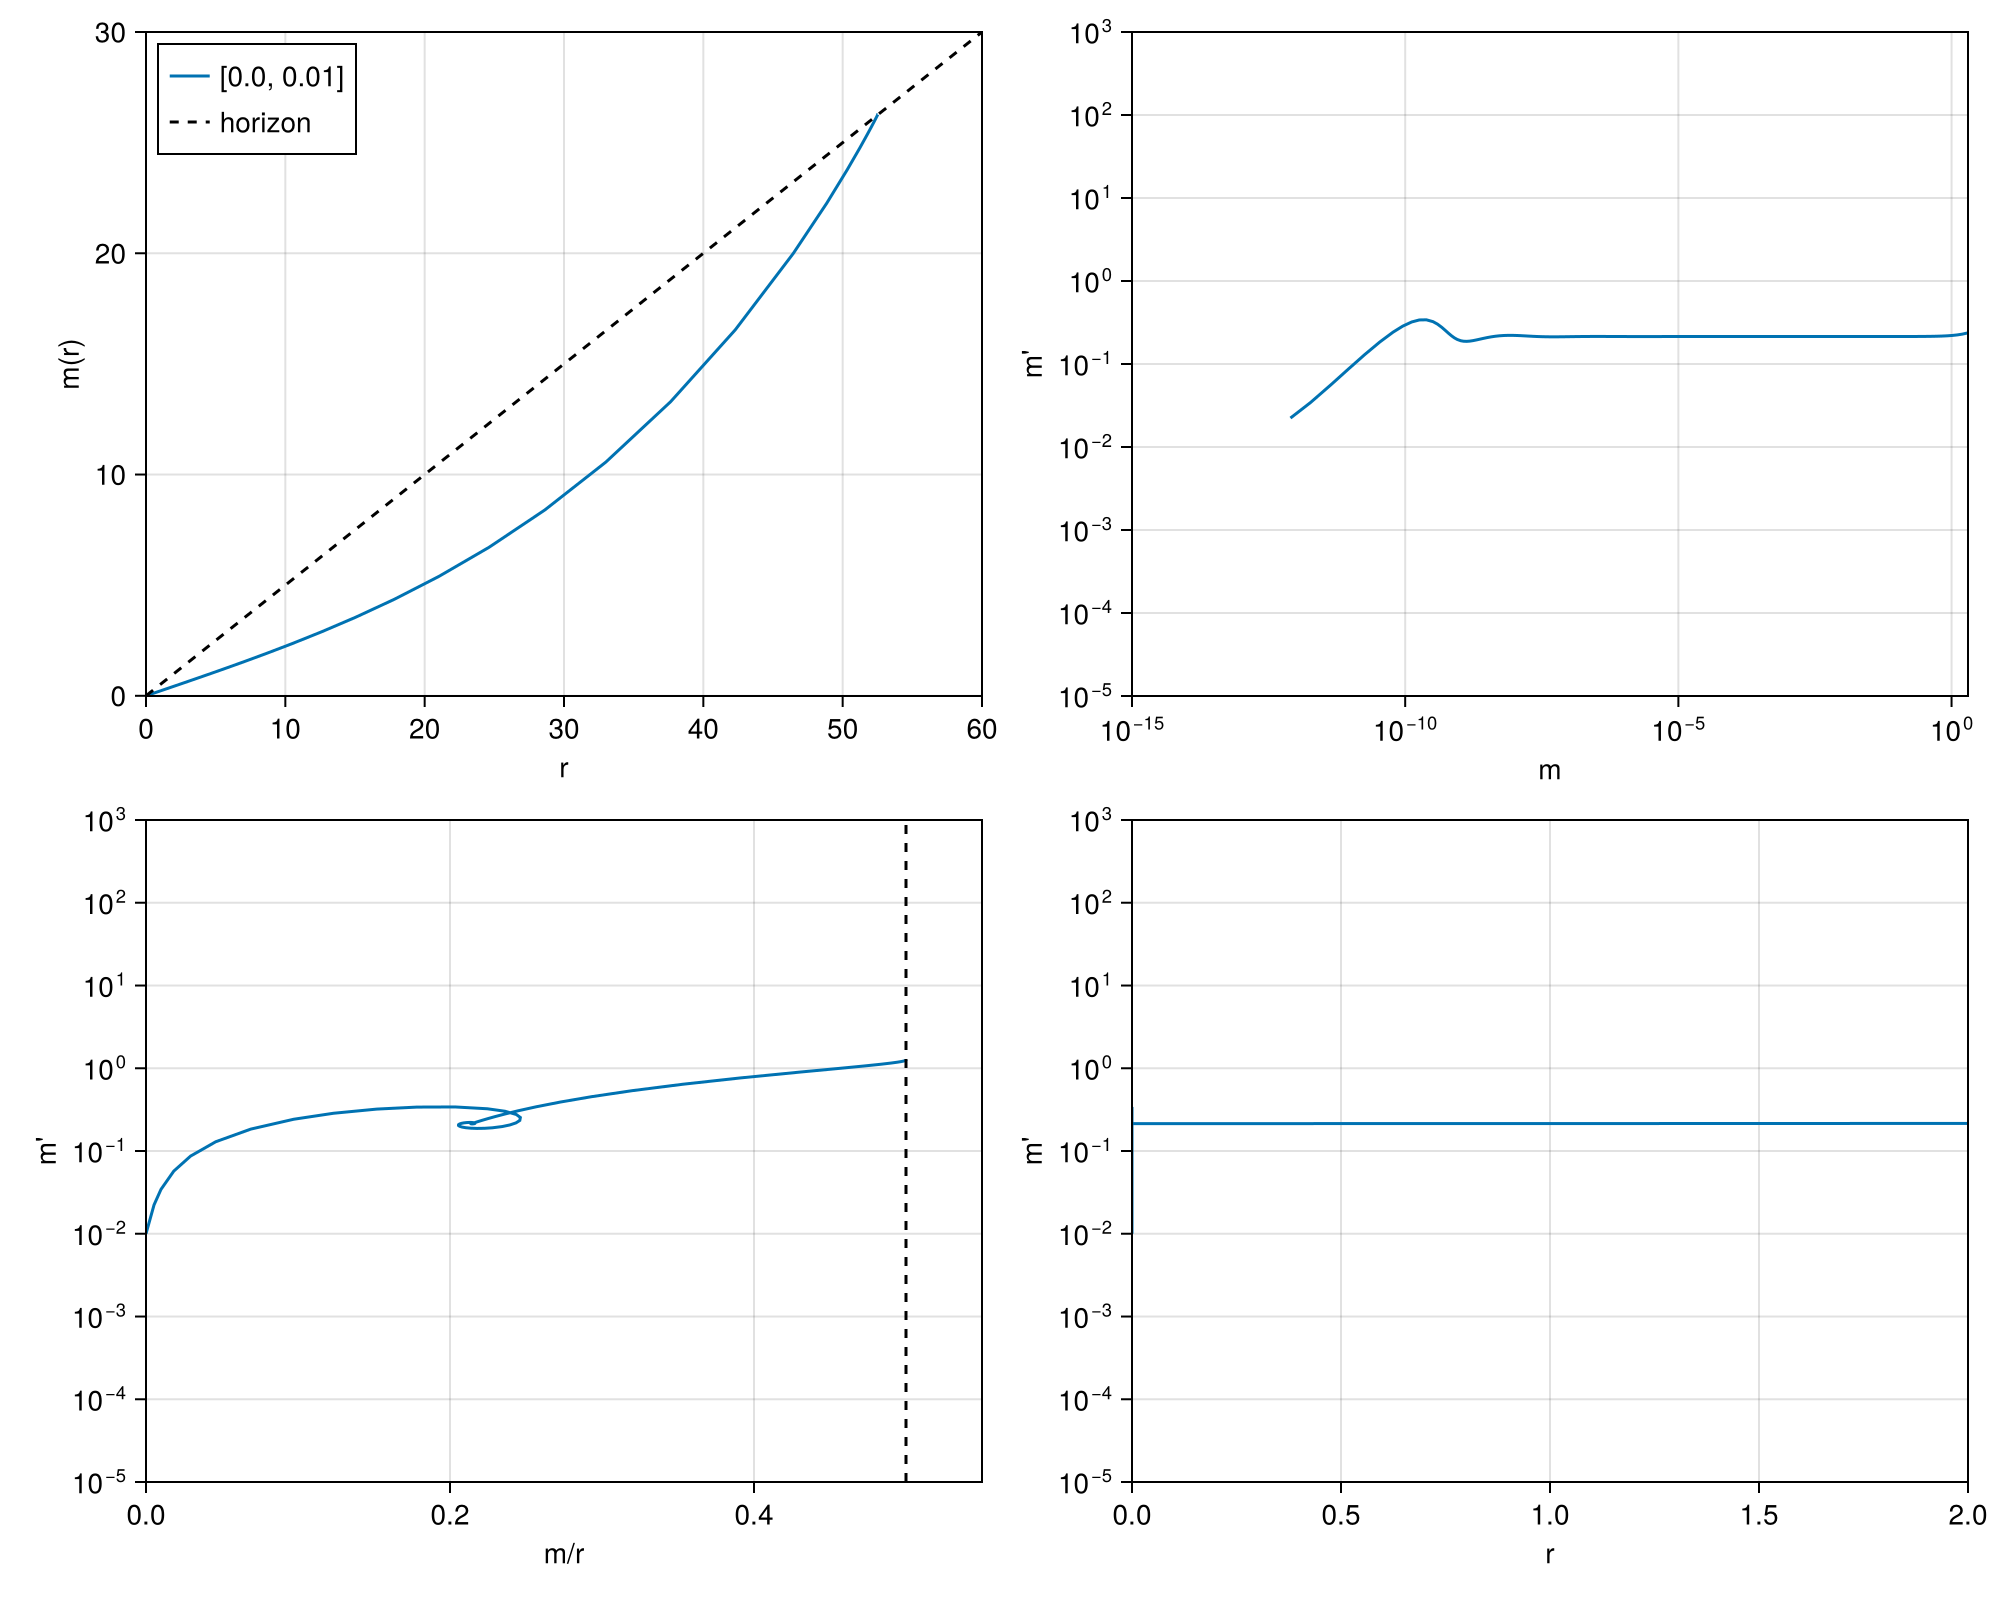

In [12]:
# Parameters (adjust as needed)
const x = 3.0
const w = 1e-3

# Rewrite the second-order ODE as a first-order system
# y[1] = m, y[2] = m'
function m_ode!(du, y, p, r)
    x, w = p
    m  = y[1]
    mp = y[2]

    # Avoid division by zero near r = 0
    denom = x * (r - 2*m)*r

    if denom <=1e-8
        du[1] = 1.0
        du[2] = 0.0
    end
    # Second derivative from the given equation
    mpp = (
        - mp * x * (-2r + (x+5)*m)
        - (x+1) * r * mp^2
        + w * r^2 * (x*m + (x+2)*r*mp)
        - w^2 * r^5
    ) / denom

    du[1] = mp
    du[2] = mpp
end
# Event: detect r = 2m(r)
# We stop integration exactly at the crossing to avoid the singular denominator
function crossing_condition(u, r, integrator)
    m = u[1]
    return r - 2m
end

function crossing_affect!(integrator)
    terminate!(integrator)
end

crossing_cb = ContinuousCallback(crossing_condition, crossing_affect!)

params = (x, w)

# Integration domain
rspan = (1e-10, 60.0)

# Define three sets of initial conditions
#=
ics = Dict(
    "m(0)=0, m'(0)!=0" => [0.0, 1.0],
    #"m(0)!=0, m'(0)=0" => [0.5, 0.0],
    #"m(0)=m'(0)=0"   => [0.0, 0.0]
)
=#

"m(0),m'(0)"
ics = [
    [0.0,0.01],
    #[0.0,0.1],
    #[0.0,0.5],
    #[0.0,1.0],
    #[0.0,2.0],
    #[0.0,10.0],
    #[0.0,20.0],
    #[0.0,100.0],
]


# Solve and plot
fig = Figure(size = (1000, 800))

ax_rm  = Axis(
    fig[1, 1], 
    xlabel = "r",
    ylabel = "m(r)", 
    limits =(
        (0,60), 
        (-0.01, 30)
    )
)
ax_phase = Axis(
    fig[1, 2], 
    xlabel = "m",
    ylabel = "m'",
    xscale = log10,
    yscale = log10,
    limits = (
        (1e-15,2), 
        (1e-5,1e3)
    )
)
ax_phase_scaled = Axis(
    fig[2, 1],
    xlabel = "m/r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (0,0.55),
        (1e-5,1e3)
    )
)

ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (0,2),
        (1e-5,1e3)
    )
)

for y0 in ics
    prob = ODEProblem(m_ode!, y0, rspan, params)
    
    sol = solve(
        prob,
        Vern9();
        callback = crossing_cb,
        abstol=1e-9,
        reltol=1e-9)

    rvals = sol.t
    mvals = sol[1, :]
    mpvals = sol[2, :]
    
    lines!(ax_rm, rvals, mvals,  label = "$(y0)")
    lines!(ax_phase, mvals, mpvals, label = "$(y0)")
    lines!(ax_phase_scaled, mvals ./ rvals, mpvals, label = "$(y0)")
    lines!(ax_deriv,rvals, mpvals, label = "$(y0)")
end

r_horizon = range(rspan[1],60.0,100)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")

vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")

axislegend(ax_rm,position = :lt)
#axislegend(ax_phase, position = :lt)
#Legend(fig[2,2],ax_phase_scaled)

fig


┌ Warning: At t=52.51051483852308, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671
┌ Warning: At t=52.51051479701806, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671
┌ Warning: At t=52.510514801366256, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or t

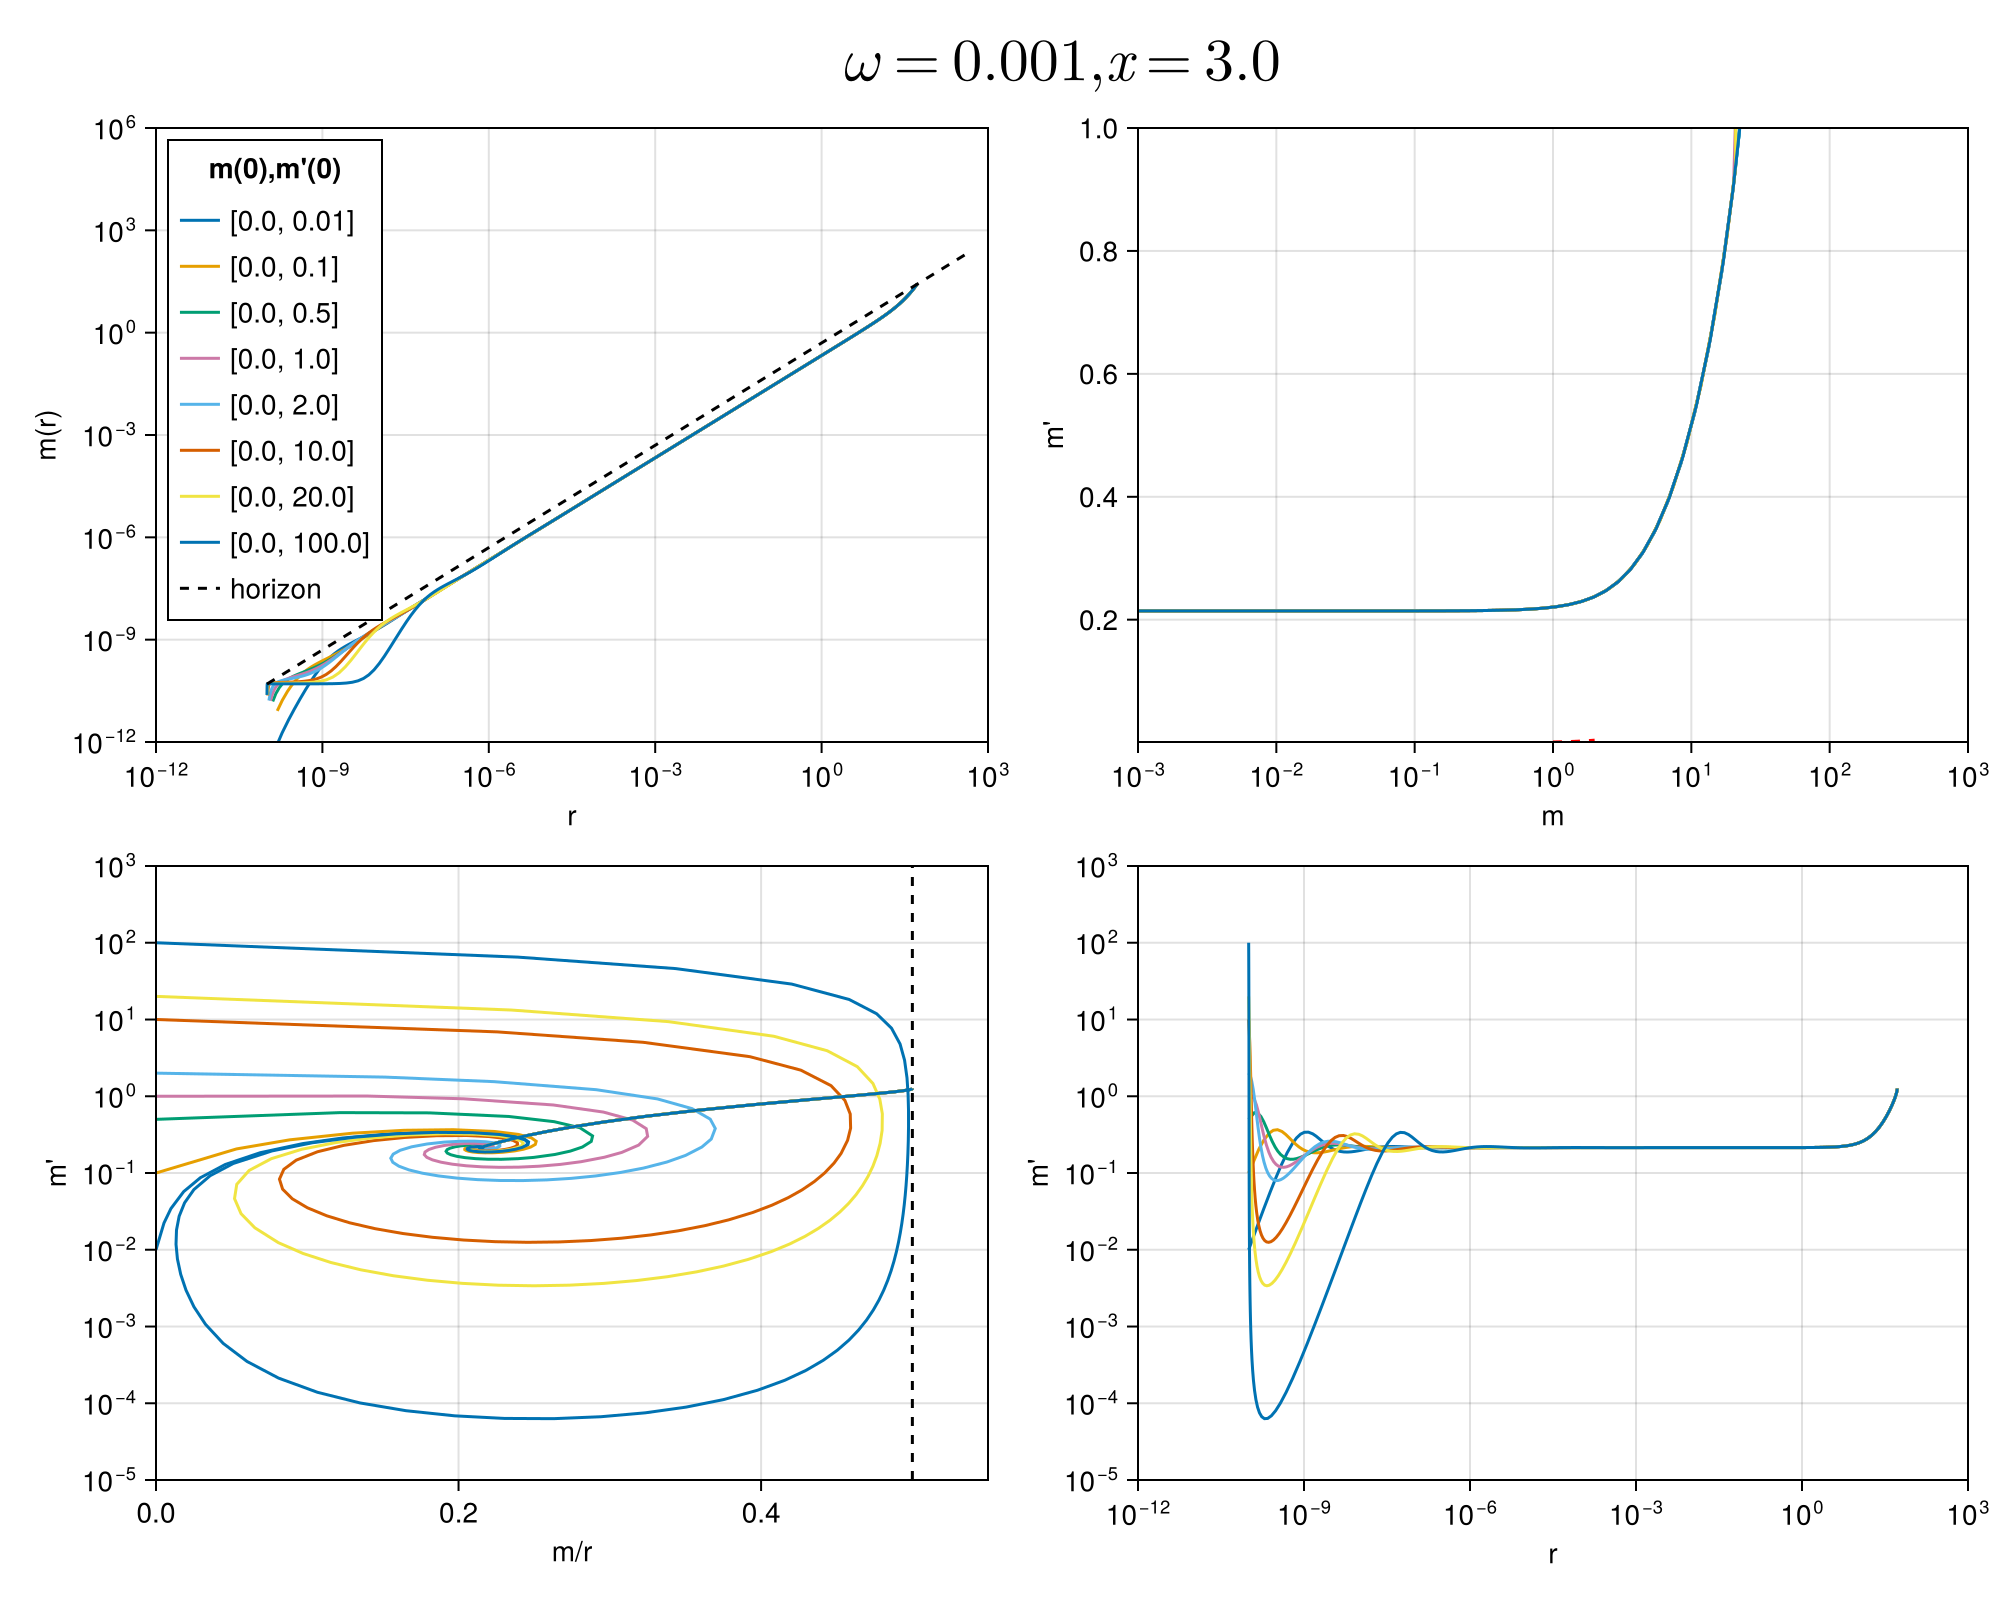

[ Info: Saved in reg_sol_om0.001_x3.0.pdf


In [52]:
# Parameters (adjust as needed)
const x = 3.0
const w = 1e-3

# Rewrite the second-order ODE as a first-order system
# y[1] = m, y[2] = m'
function m_ode!(du, y, p, r)
    x, w = p
    m  = y[1]
    mp = y[2]

    # Avoid division by zero near r = 0
    denom = x * (r - 2*m)*r

    if denom <=1e-8
        du[1] = 1.0
        du[2] = 0.0
    end
    # Second derivative from the given equation
    mpp = (
        - mp * x * (-2r + (x+5)*m)
        - (x+1) * r * mp^2
        + w * r^2 * (x*m + (x+2)*r*mp)
        - w^2 * r^5
    ) / denom

    du[1] = mp
    du[2] = mpp
end
# Event: detect r = 2m(r)
# We stop integration exactly at the crossing to avoid the singular denominator
function crossing_condition(u, r, integrator)
    m = u[1]
    return r - 2m
end

function crossing_affect!(integrator)
    terminate!(integrator)
end

crossing_cb = ContinuousCallback(crossing_condition, crossing_affect!)

params = (x, w)

# Integration domain
rspan = (1e-10, 1e3)

# Define three sets of initial conditions
#=
ics = Dict(
    "m(0)=0, m'(0)!=0" => [0.0, 1.0],
    #"m(0)!=0, m'(0)=0" => [0.5, 0.0],
    #"m(0)=m'(0)=0"   => [0.0, 0.0]
)
=#

"m(0),m'(0)"
ics = [
    [0.0,0.01],
    [0.0,0.1],
    [0.0,0.5],
    [0.0,1.0],
    [0.0,2.0],
    [0.0,10.0],
    [0.0,20.0],
    [0.0,100.0],
]


# Solve and plot
fig = Figure( size = (1000, 800))

ax_rm  = Axis(
    fig[1, 1], 
    xlabel = "r",
    xscale = log10,
    ylabel = "m(r)", 
    yscale = log10,
    limits =(
        (1e-12,1e3), 
        (1e-12, 1e6)
    )
)
ax_phase = Axis(
    fig[1, 2], 
    xlabel = "m",
    ylabel = "m'",
    xscale = log10,
    yscale = Makie.Symlog10(-1e3,1e0),
    limits = (
        (1e-3,1e3),
        #(-1e-7,1e-7), 
        (1e-3,1e0)
    )
)
ax_phase_scaled = Axis(
    fig[2, 1],
    xlabel = "m/r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (0,0.55),
        (1e-5,1e3)
    )
)

ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    xscale = log10,
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (1e-12,1e3),
        (1e-5,1e3)
    )
)

#=
ax_deriv_zoom = Axis(
    fig[2, 2],
    width = Relative(0.4),
    height = Relative(0.4),
    halign = 0.25,
    valign = 0.8,
    #xlabel = "r",
    xscale = log10,
    #ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    #yscale = log10,
    limits = (
        (1e-8,1e-3),
        (0,0.4)
    ),
    title="zoomed view"
)
=#

for y0 in ics
    prob = ODEProblem(m_ode!, y0, rspan, params)
    sol = solve(
        prob,
        Vern9();
        callback = crossing_cb,
        abstol=1e-9,
        reltol=1e-9)

    rvals = sol.t
    mvals = sol[1, :]
    mpvals = sol[2, :]
    
    lines!(ax_rm, rvals, mvals,  label = "$(y0)")
    lines!(ax_phase, mvals, mpvals, label = "$(y0)")
    lines!(ax_phase_scaled, mvals ./ rvals, mpvals, label = "$(y0)")
    lines!(ax_deriv,rvals, mpvals, label = "$(y0)")
    #lines!(ax_deriv_zoom,rvals, mpvals, label = "$(y0)")
end

r_horizon = range(rspan[1],500,500)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")

vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")

axislegend(ax_rm,"m(0),m'(0)",position = :lt)


ms = range(0.01, 2.0; length=400)

mprime_plus  = Float64[]
mprime_minus = Float64[]
ms_valid     = Float64[]

for m in ms
    slopes = admissible_slopes(m, x, w)
    slopes === Float64[] && continue
    

    push!(ms_valid, m)
    push!(mprime_minus, slopes[1])
    push!(mprime_plus,  slopes[2])
end
lines!(ax_phase, ms_valid, mprime_minus;
       linestyle = :dash, color = :black,
       label = "horizon branch −")

lines!(ax_phase, ms_valid, mprime_plus;
       linestyle = :dash, color = :red,
       label = "horizon branch +")

Label(fig[0, :], LaTeXStrings.latexstring("\\omega = $(w), x = $(x)"), fontsize = 30)

display(fig)
filename = "reg_sol_om$(w)_x$(x).pdf"
save(filename, fig)
@info "Saved in $(filename)"

┌ Warning: At t=52.51051488777492, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671
┌ Warning: At t=52.510514231854664, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671
┌ Warning: At t=52.51050719577273, dt was forced below floating point epsilon 7.105427357601002e-15, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or t

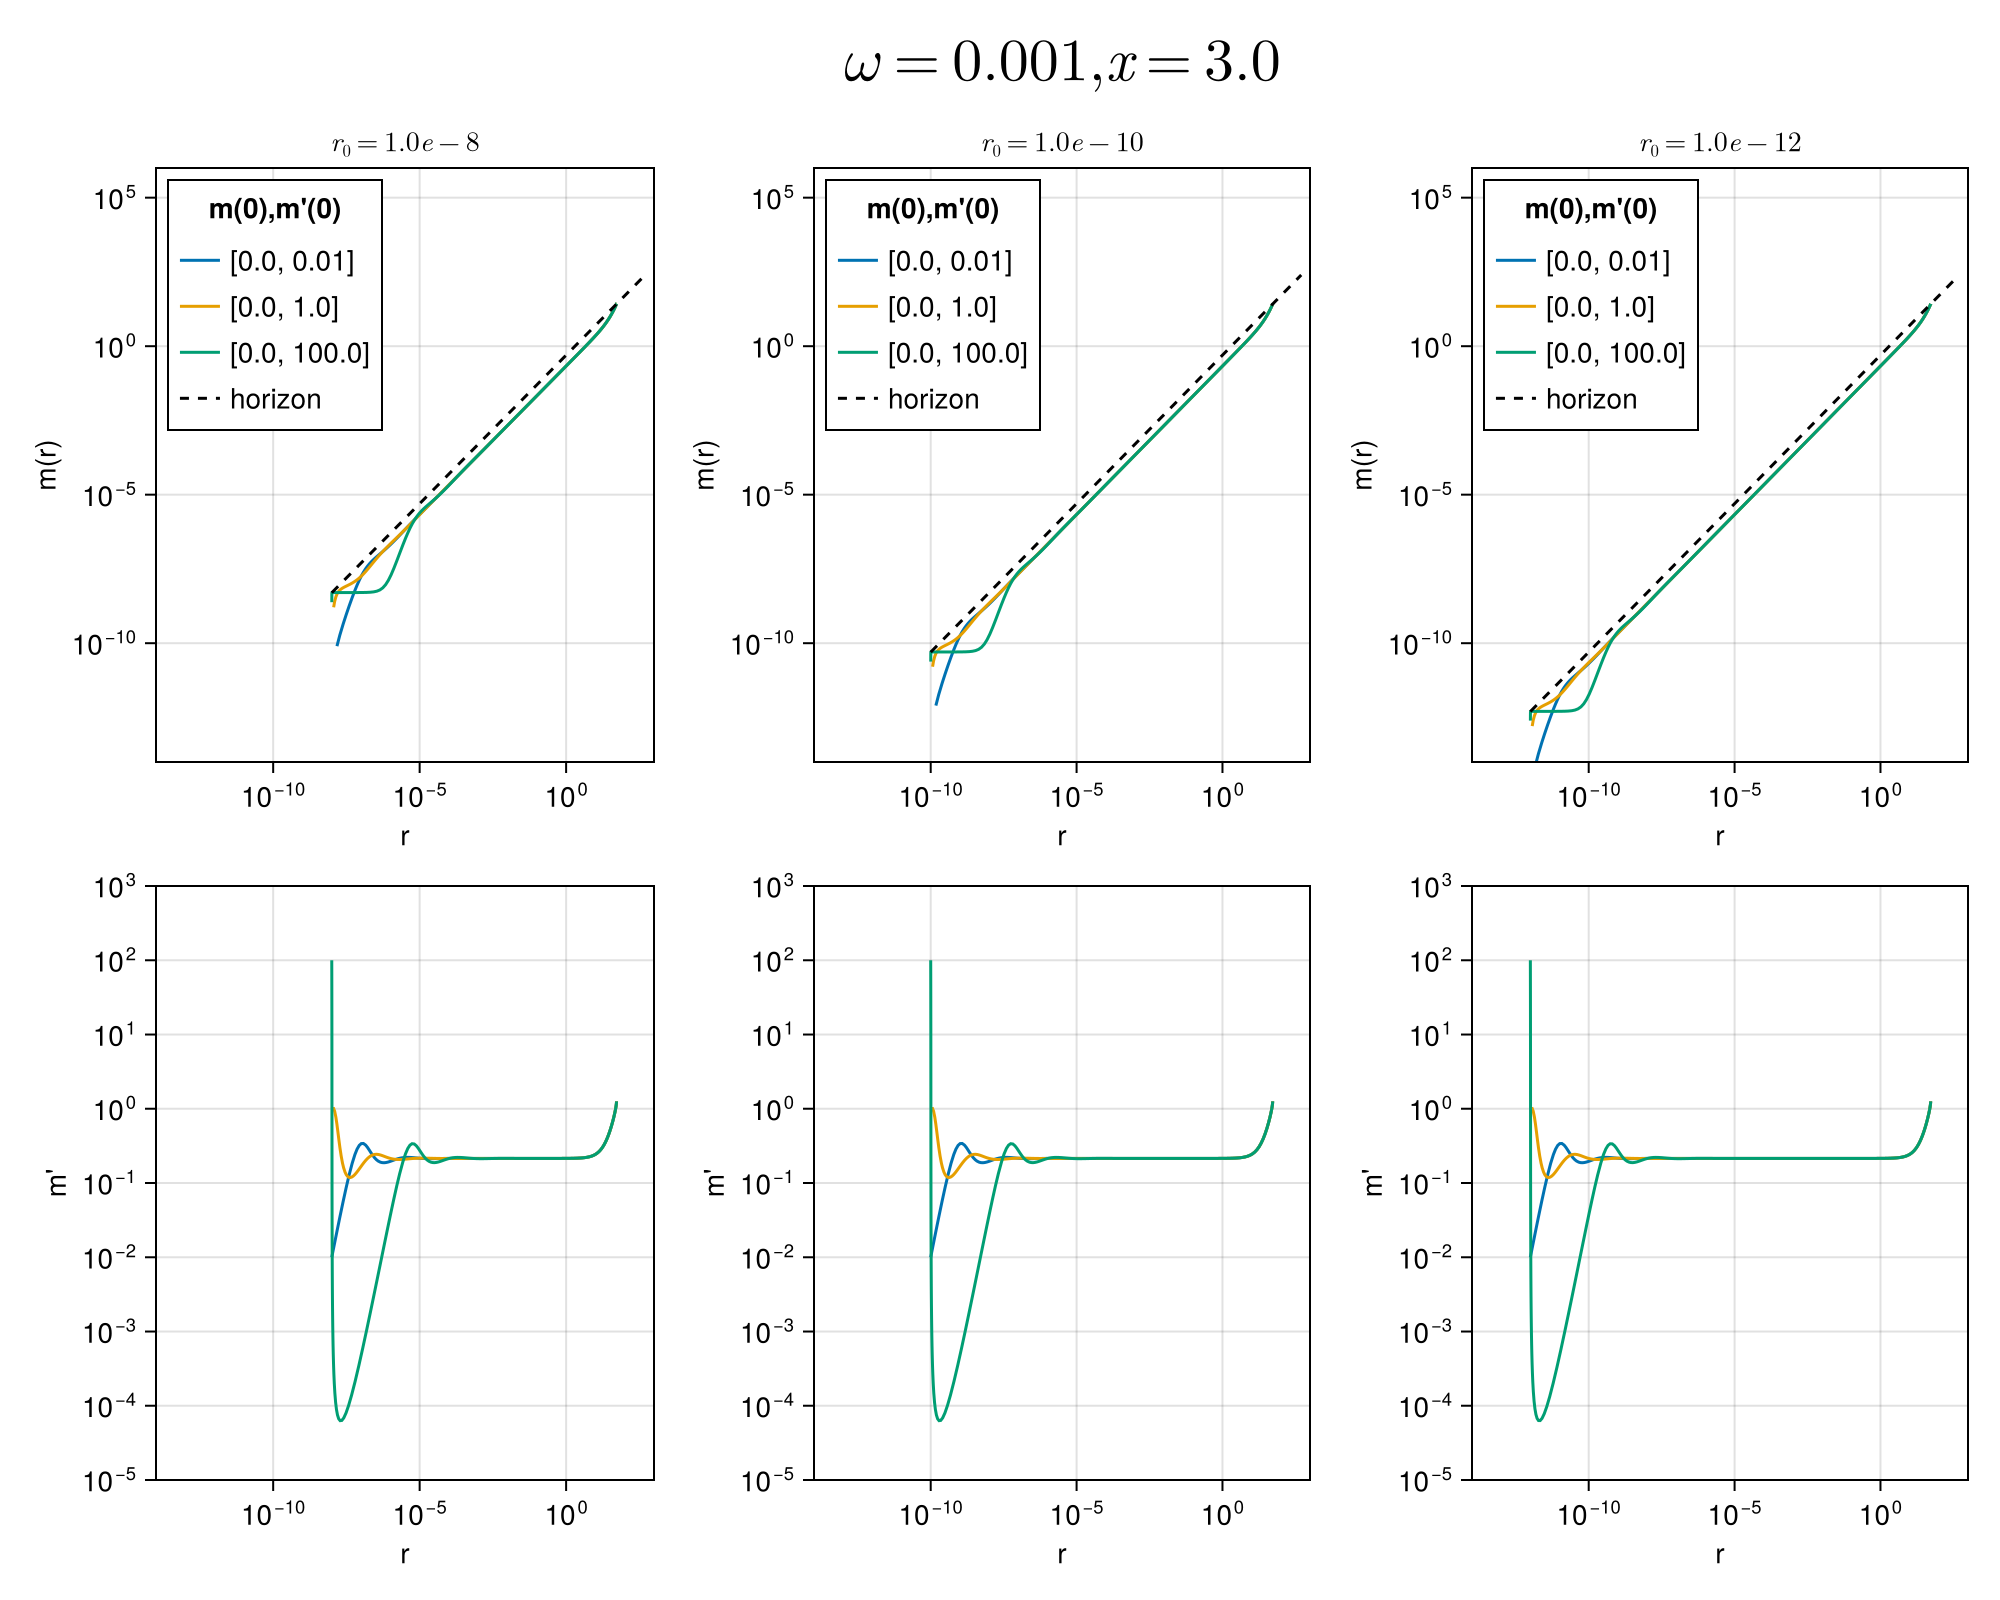

[ Info: Saved in reg_sol_r0dep_om0.001_x3.0.pdf


In [85]:
# Parameters (adjust as needed)
const x = 3.0
const w = 1e-3

# Rewrite the second-order ODE as a first-order system
# y[1] = m, y[2] = m'
function m_ode!(du, y, p, r)
    x, w = p
    m  = y[1]
    mp = y[2]

    # Avoid division by zero near r = 0
    denom = x * (r - 2*m)*r

    if denom <=1e-8
        du[1] = 1.0
        du[2] = 0.0
    end
    # Second derivative from the given equation
    mpp = (
        - mp * x * (-2r + (x+5)*m)
        - (x+1) * r * mp^2
        + w * r^2 * (x*m + (x+2)*r*mp)
        - w^2 * r^5
    ) / denom

    du[1] = mp
    du[2] = mpp
end
# Event: detect r = 2m(r)
# We stop integration exactly at the crossing to avoid the singular denominator
function crossing_condition(u, r, integrator)
    m = u[1]
    return r - 2m
end

function crossing_affect!(integrator)
    terminate!(integrator)
end

crossing_cb = ContinuousCallback(crossing_condition, crossing_affect!)

params = (x, w)




# Solve and plot
fig = Figure( size = (1000, 800))



r0_dom = [1e-8,1e-10,1e-12]
for (ir,r0) in enumerate(r0_dom)
    ax_rm  = Axis(
        fig[1, ir], 
        xlabel = "r",
        xscale = log10,
        ylabel = "m(r)", 
        yscale = log10,
        limits =(
            (1e-14,1e3), 
            (1e-14, 1e6)
        ),
        title = latexstring("r_0 = $(r0)")
    )
    
    ax_deriv = Axis(
        fig[2, ir],
        xlabel = "r",
        xscale = log10,
        ylabel = "m'",
        #yscale = Makie.Symlog10(-1e-10,1e2),
        yscale = log10,
        limits = (
            (1e-14,1e3),
            (1e-5,1e3)
        ),
)
    # Integration domain
    rspan = (r0, 1e3)
    
    # "m(0),m'(0)"
    ics = [
        [0.0,0.01],
        [0.0,1.0],
        [0.0,100.0],
    ]
    
    for y0 in ics
        prob = ODEProblem(m_ode!, y0, rspan, params)
        sol = solve(
            prob,
            Vern9();
            callback = crossing_cb,
            abstol=1e-9,
            reltol=1e-9)
    
        rvals = sol.t
        mvals = sol[1, :]
        mpvals = sol[2, :]
        
        lines!(ax_rm, rvals, mvals,  label = "$(y0)")
        lines!(ax_phase_scaled, mvals ./ rvals, mpvals, label = "$(y0)")
        lines!(ax_deriv,rvals, mpvals, label = "$(y0)")
        #lines!(ax_deriv_zoom,rvals, mpvals, label = "$(y0)")
    end
    
    r_horizon = range(rspan[1],500,500)
    m_horizon = r_horizon ./ 2
    lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")
    
    vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")
    
    axislegend(ax_rm,"m(0),m'(0)",position = :lt)
    
    
    ms = range(0.01, 2.0; length=400)
    
    mprime_plus  = Float64[]
    mprime_minus = Float64[]
    ms_valid     = Float64[]
    
    for m in ms
        slopes = admissible_slopes(m, x, w)
        slopes === Float64[] && continue
        
    
        push!(ms_valid, m)
        push!(mprime_minus, slopes[1])
        push!(mprime_plus,  slopes[2])
    end
    lines!(ax_phase, ms_valid, mprime_minus;
           linestyle = :dash, color = :black,
           label = "horizon branch −")
    
    lines!(ax_phase, ms_valid, mprime_plus;
           linestyle = :dash, color = :red,
           label = "horizon branch +")
end
Label(fig[0, :], LaTeXStrings.latexstring("\\omega = $(w), x = $(x)"), fontsize = 30)

display(fig)
filename = "reg_sol_r0dep_om$(w)_x$(x).pdf"
save(filename, fig)
@info "Saved in $(filename)"

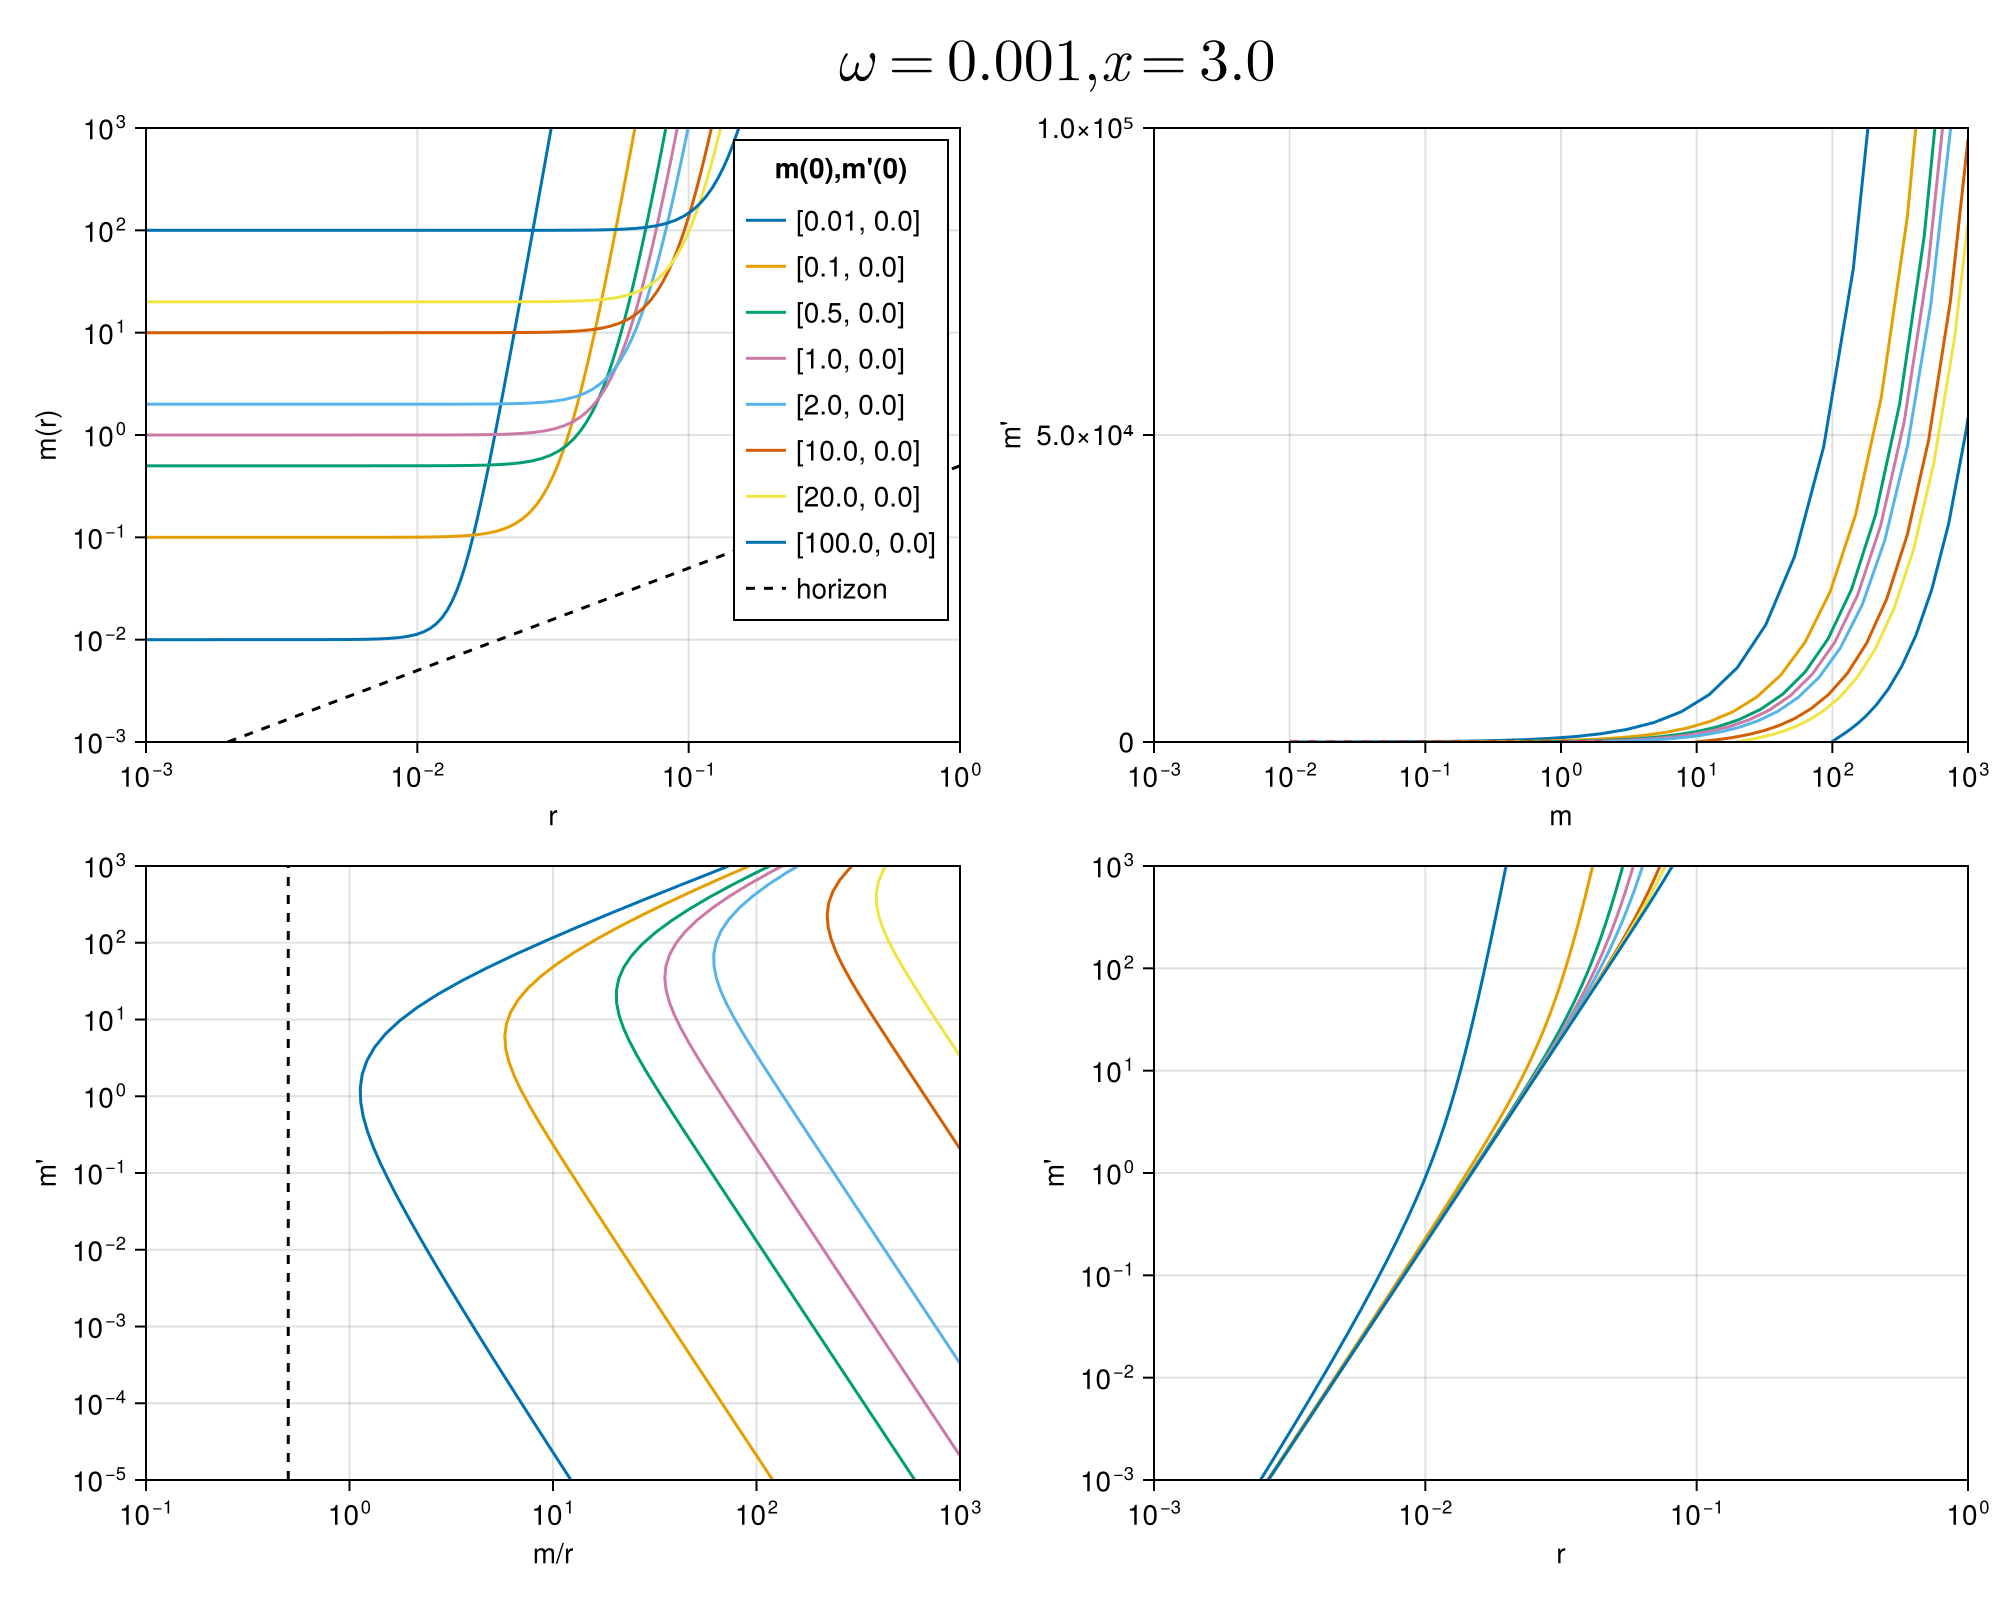

[ Info: Saved in reg_sol_zero_mp_om0.001_x3.0.pdf


In [80]:
# Parameters (adjust as needed)
const x = 3.0
const w = 1e-3

# Rewrite the second-order ODE as a first-order system
# y[1] = m, y[2] = m'
function m_ode!(du, y, p, r)
    x, w = p
    m  = y[1]
    mp = y[2]

    # Avoid division by zero near r = 0
    denom = x * (r - 2*m)*r

    if denom <=1e-8
        du[1] = 1.0
        du[2] = 0.0
    end
    # Second derivative from the given equation
    mpp = (
        - mp * x * (-2r + (x+5)*m)
        - (x+1) * r * mp^2
        + w * r^2 * (x*m + (x+2)*r*mp)
        - w^2 * r^5
    ) / denom

    du[1] = mp
    du[2] = mpp
end
# Event: detect r = 2m(r)
# We stop integration exactly at the crossing to avoid the singular denominator
function crossing_condition(u, r, integrator)
    m = u[1]
    return r - 2m
end

function crossing_affect!(integrator)
    terminate!(integrator)
end

crossing_cb = ContinuousCallback(crossing_condition, crossing_affect!)

params = (x, w)

# Integration domain
rspan = (1e-15, 1e3)

# Define three sets of initial conditions
#=
ics = Dict(
    "m(0)=0, m'(0)!=0" => [0.0, 1.0],
    #"m(0)!=0, m'(0)=0" => [0.5, 0.0],
    #"m(0)=m'(0)=0"   => [0.0, 0.0]
)
=#

"m(0),m'(0)"
ics = [
    [0.01, 0.0],
    [0.1, 0.0],
    [0.5, 0.0],
    [1.0, 0.0],
    [2.0, 0.0],
    [10.0, 0.0],
    [20.0, 0.0],
    [100.0, 0.0],
]


# Solve and plot
fig = Figure( size = (1000, 800))

ax_rm  = Axis(
    fig[1, 1], 
    xlabel = "r",
    xscale = log10,
    ylabel = "m(r)", 
    yscale = log10,
    limits =(
        (1e-3,1e0), 
        (1e-3, 1e3)
    )
)
ax_phase = Axis(
    fig[1, 2], 
    xlabel = "m",
    ylabel = "m'",
    xscale = log10,
    #yscale = Makie.Symlog10(-1e3,1e5),
    limits = (
        (1e-3,1e3),
        #(-1e-7,1e-7), 
        (0.0,1e5)
    )
)
ax_phase_scaled = Axis(
    fig[2, 1],
    xlabel = "m/r",
    xscale = log10,
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (1e-1,1e3),
        (1e-5,1e3)
    )
)

ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    xscale = log10,
    ylabel = "m'",
    yscale = log10,
    #yscale = Makie.Symlog10(-1e-10,1e2),
    #yscale = log10,
    limits = (
        (1e-3,1),
        (1e-3,1e3)
    )
)

#=
ax_deriv_zoom = Axis(
    fig[2, 2],
    width = Relative(0.4),
    height = Relative(0.4),
    halign = 0.25,
    valign = 0.8,
    #xlabel = "r",
    xscale = log10,
    #ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    #yscale = log10,
    limits = (
        (1e-8,1e-3),
        (0,0.4)
    ),
    title="zoomed view"
)
=#

for y0 in ics
    prob = ODEProblem(m_ode!, y0, rspan, params)
    sol = solve(
        prob,
        Vern9();
        callback = crossing_cb,
        abstol=1e-9,
        reltol=1e-9)

    rvals = sol.t
    mvals = sol[1, :]
    mpvals = sol[2, :]
    
    lines!(ax_rm, rvals, mvals,  label = "$(y0)")
    lines!(ax_phase, mvals, mpvals, label = "$(y0)")
    lines!(ax_phase_scaled, mvals ./ rvals, mpvals, label = "$(y0)")
    lines!(ax_deriv,rvals, mpvals, label = "$(y0)")
    #lines!(ax_deriv_zoom,rvals, mpvals, label = "$(y0)")
end

r_horizon = range(rspan[1],500,500)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")

vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")

axislegend(ax_rm,"m(0),m'(0)",position = :rt)


ms = range(0.01, 2.0; length=400)

mprime_plus  = Float64[]
mprime_minus = Float64[]
ms_valid     = Float64[]

for m in ms
    slopes = admissible_slopes(m, x, w)
    slopes === Float64[] && continue
    

    push!(ms_valid, m)
    push!(mprime_minus, slopes[1])
    push!(mprime_plus,  slopes[2])
end
lines!(ax_phase, ms_valid, mprime_minus;
       linestyle = :dash, color = :black,
       label = "horizon branch −")

lines!(ax_phase, ms_valid, mprime_plus;
       linestyle = :dash, color = :red,
       label = "horizon branch +")

Label(fig[0, :], LaTeXStrings.latexstring("\\omega = $(w), x = $(x)"), fontsize = 30)

display(fig)
filename = "reg_sol_zero_mp_om$(w)_x$(x).pdf"
save(filename, fig)
@info "Saved in $(filename)"

# Admissible crossings

In [14]:
# ------------------------------------------------------------
# Admissible slopes at the horizon r = 2m
# ------------------------------------------------------------
function admissible_slopes(mh, x, w)
    rh = 2mh

    A = -(x + 1) * rh
    B = x * (2rh - (x+5)*mh) + w * rh^3 * (x+2)
    C = w * rh^2 * x * mh - w^2 * rh^5

    Δ = B^2 - 4A*C
    Δ < 0 && return Float64[]

    return [(-B + sqrt(Δ))/(2A), (-B - sqrt(Δ))/(2A)]
end

# ------------------------------------------------------------
# Horizon → origin shooting
# ------------------------------------------------------------
function shoot_to_origin(mh; ϵ = 1e-6, rmin = 1e-10)
    rh = 2mh
    slopes = admissible_slopes(mh, x, w)

    sols = []

    for mp_h in slopes
        # Initial data slightly inside the horizon
        rspan = (rh - ϵ, rmin)
        y0 = [mh - mp_h * ϵ, mp_h]

        prob = ODEProblem(m_ode!, y0, rspan, params)
        sol = solve(
            prob,
            Vern9();
            abstol = 1e-10,
            reltol = 1e-10,
            saveat = LinRange(rspan[1], rspan[2], 800)
        )

        push!(sols, (mp_h, sol))
    end

    return sols
end

# ------------------------------------------------------------
# Run shooting
# ------------------------------------------------------------
mh = 2.0
solutions = shoot_to_origin(mh);




In [15]:
for (mp_h, sol) in solutions
   @show length(sol.t)
end

length(sol.t) = 800
length(sol.t) = 800


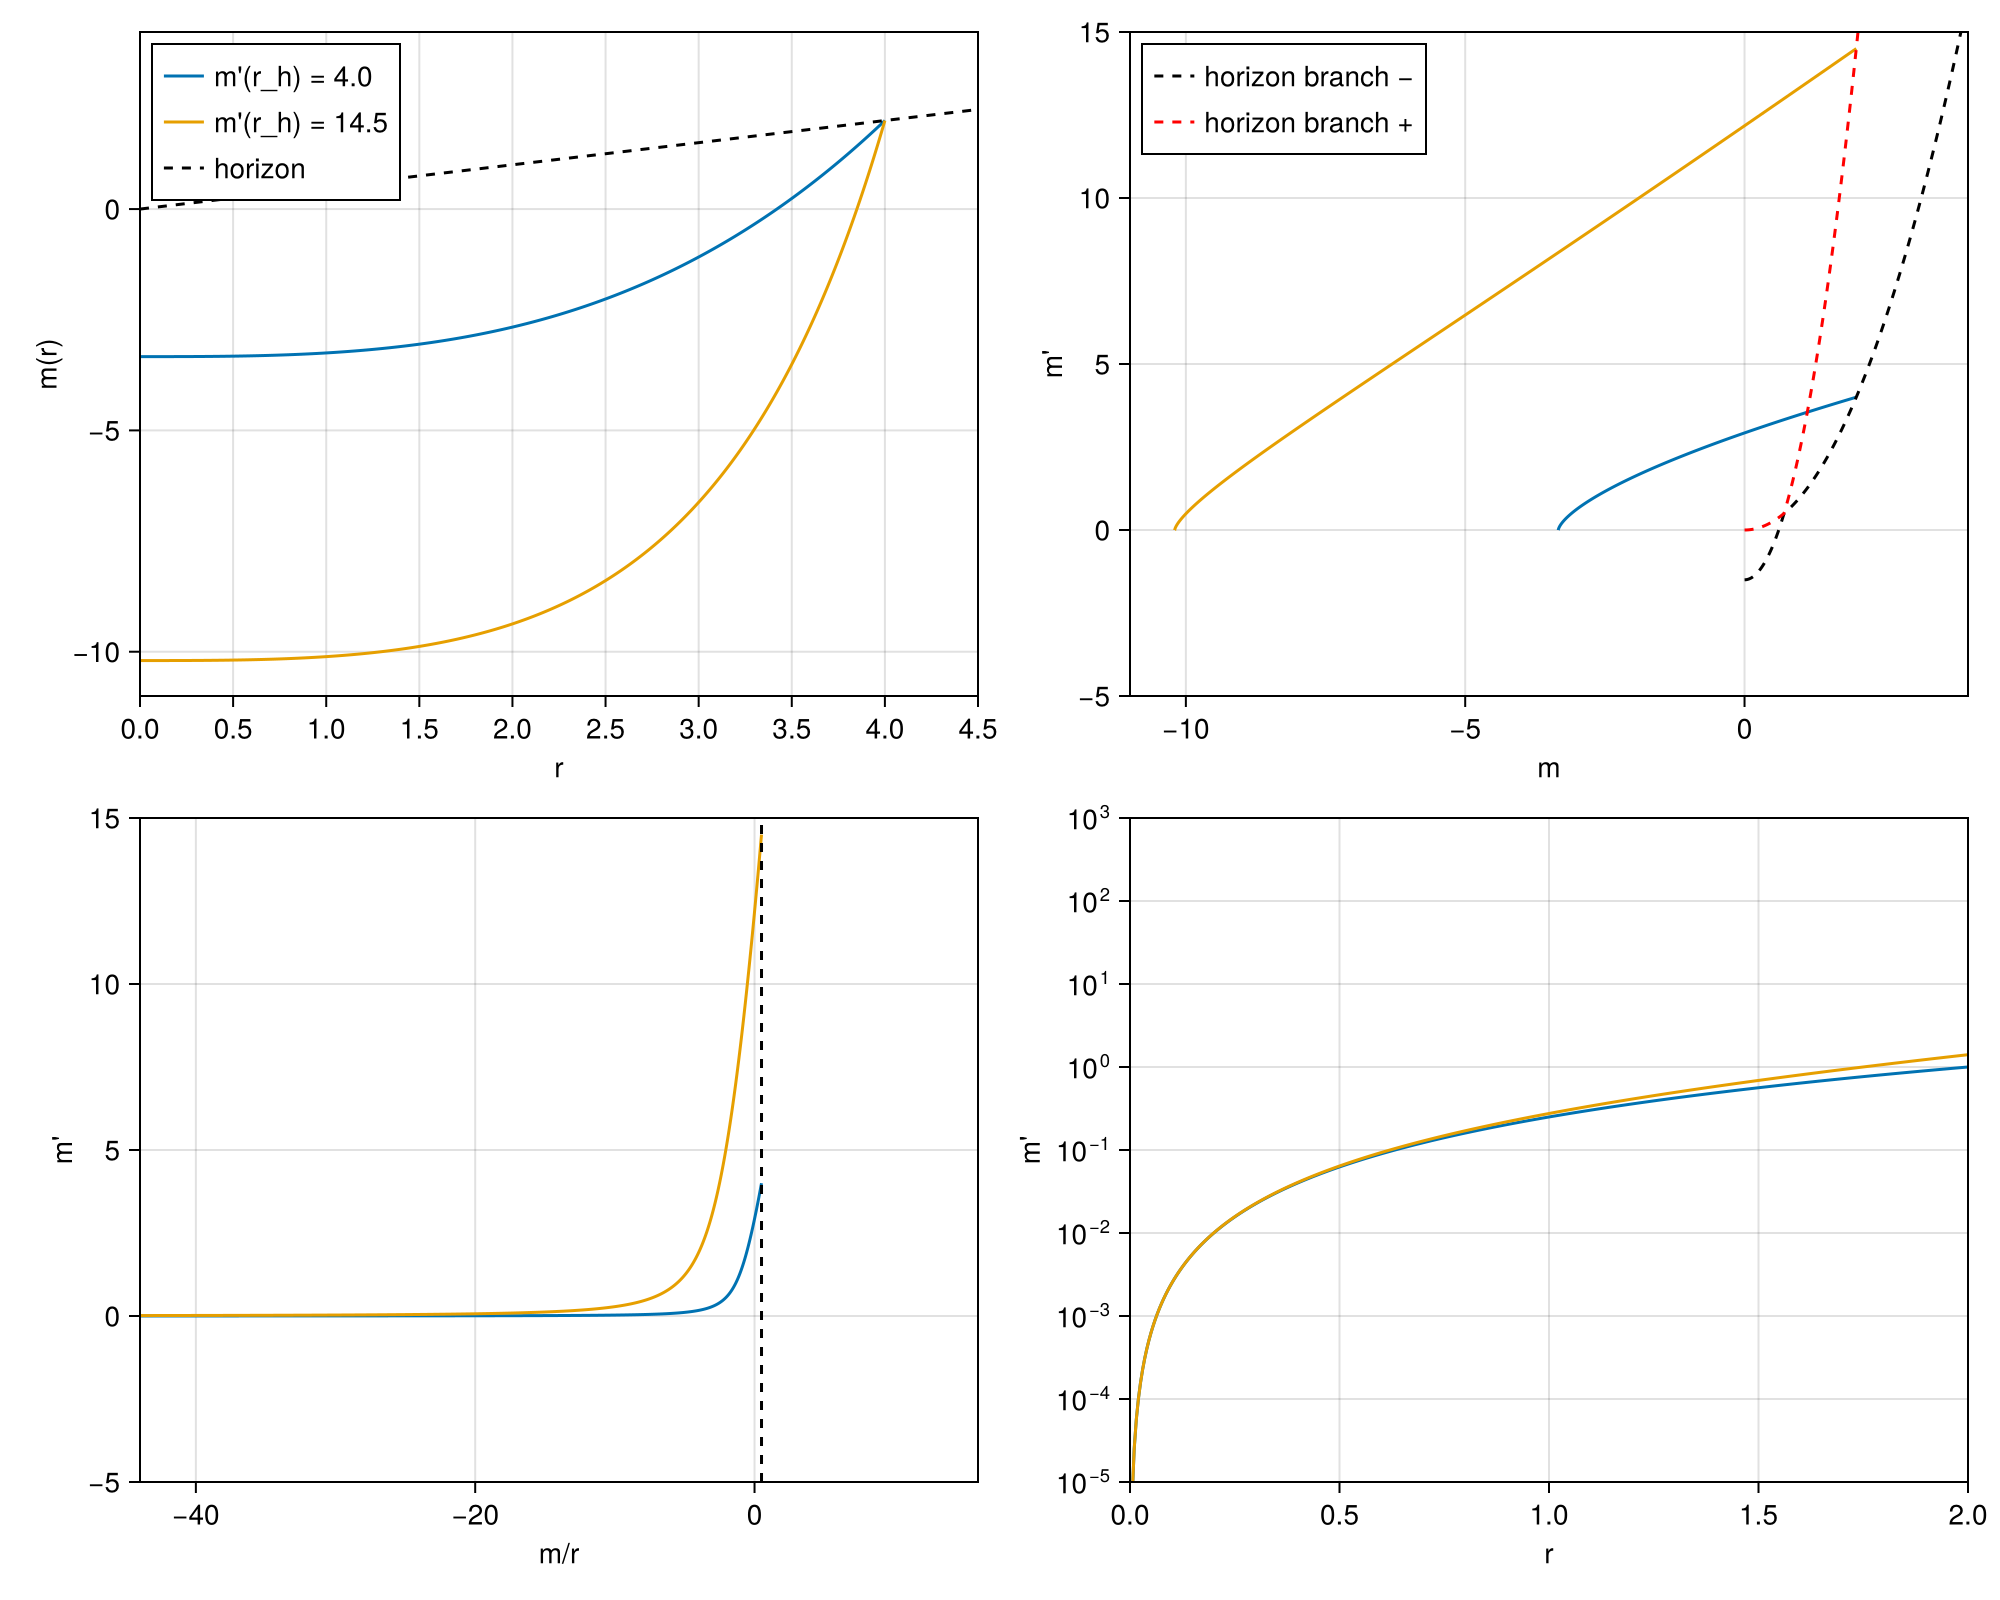

In [15]:
# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------
fig = Figure(size = (1000, 800))
ax_rm = Axis(
    fig[1,1],
    xlabel = "r",
    ylabel = "m(r)",
    limits = (
        (0,4.5), 
        (-11, 4)
    )
)
ax_phase = Axis(
    fig[1,2],
    xlabel = "m",
    ylabel = "m'",
    limits = (
        (-11, 4), 
        (-5,15)
    )
)
ax_phase_scaled = Axis(
    fig[2,1],
    xlabel = "m/r",
    ylabel = "m'",
    limits = (
        (-44, 16.0),
        (-5,15)
        )
)
ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (0,2),
        (1e-5,1e3)
    )
)

for (mp_h, sol) in solutions
    lines!(ax_rm, sol.t, sol[1,:], label = "m'(r_h) = $(round(mp_h, digits=4))")
    lines!(ax_phase, sol[1,:], sol[2,:])
    lines!(ax_phase_scaled, sol[1,:] ./ sol.t, sol[2,:])
    lines!(ax_deriv, sol.t, sol[2,:])
end

r_horizon = range(rspan[1],7.0,100)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")
vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")

axislegend(ax_rm, position=:lt)

# horizon in phase plot
ms = range(0.001, 5.0; length=400)

mprime_plus  = Float64[]
mprime_minus = Float64[]
ms_valid     = Float64[]

for m in ms
    slopes = admissible_slopes(m, x, w)
    slopes === Float64[] && continue
    #slopes[1]<=0 && continue
    #slopes[2]<=0 && continue


    push!(ms_valid, m)
    push!(mprime_minus, slopes[1])
    push!(mprime_plus,  slopes[2])
end
lines!(ax_phase, ms_valid, mprime_minus;
       linestyle = :dash, color = :black,
       label = "horizon branch −")

lines!(ax_phase, ms_valid, mprime_plus;
       linestyle = :dash, color = :red,
       label = "horizon branch +")

axislegend(ax_phase, position=:lt)
fig

┌ Warning: At t=0.7320509708168736, dt was forced below floating point epsilon -9.990486367261657e-17, and step error estimate = 1.0019588835672038. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671


mp_h = 1.0
mp_h = 2.5
mp_h = 2.25
mp_h = 7.5
mp_h = 4.0
mp_h = 14.5


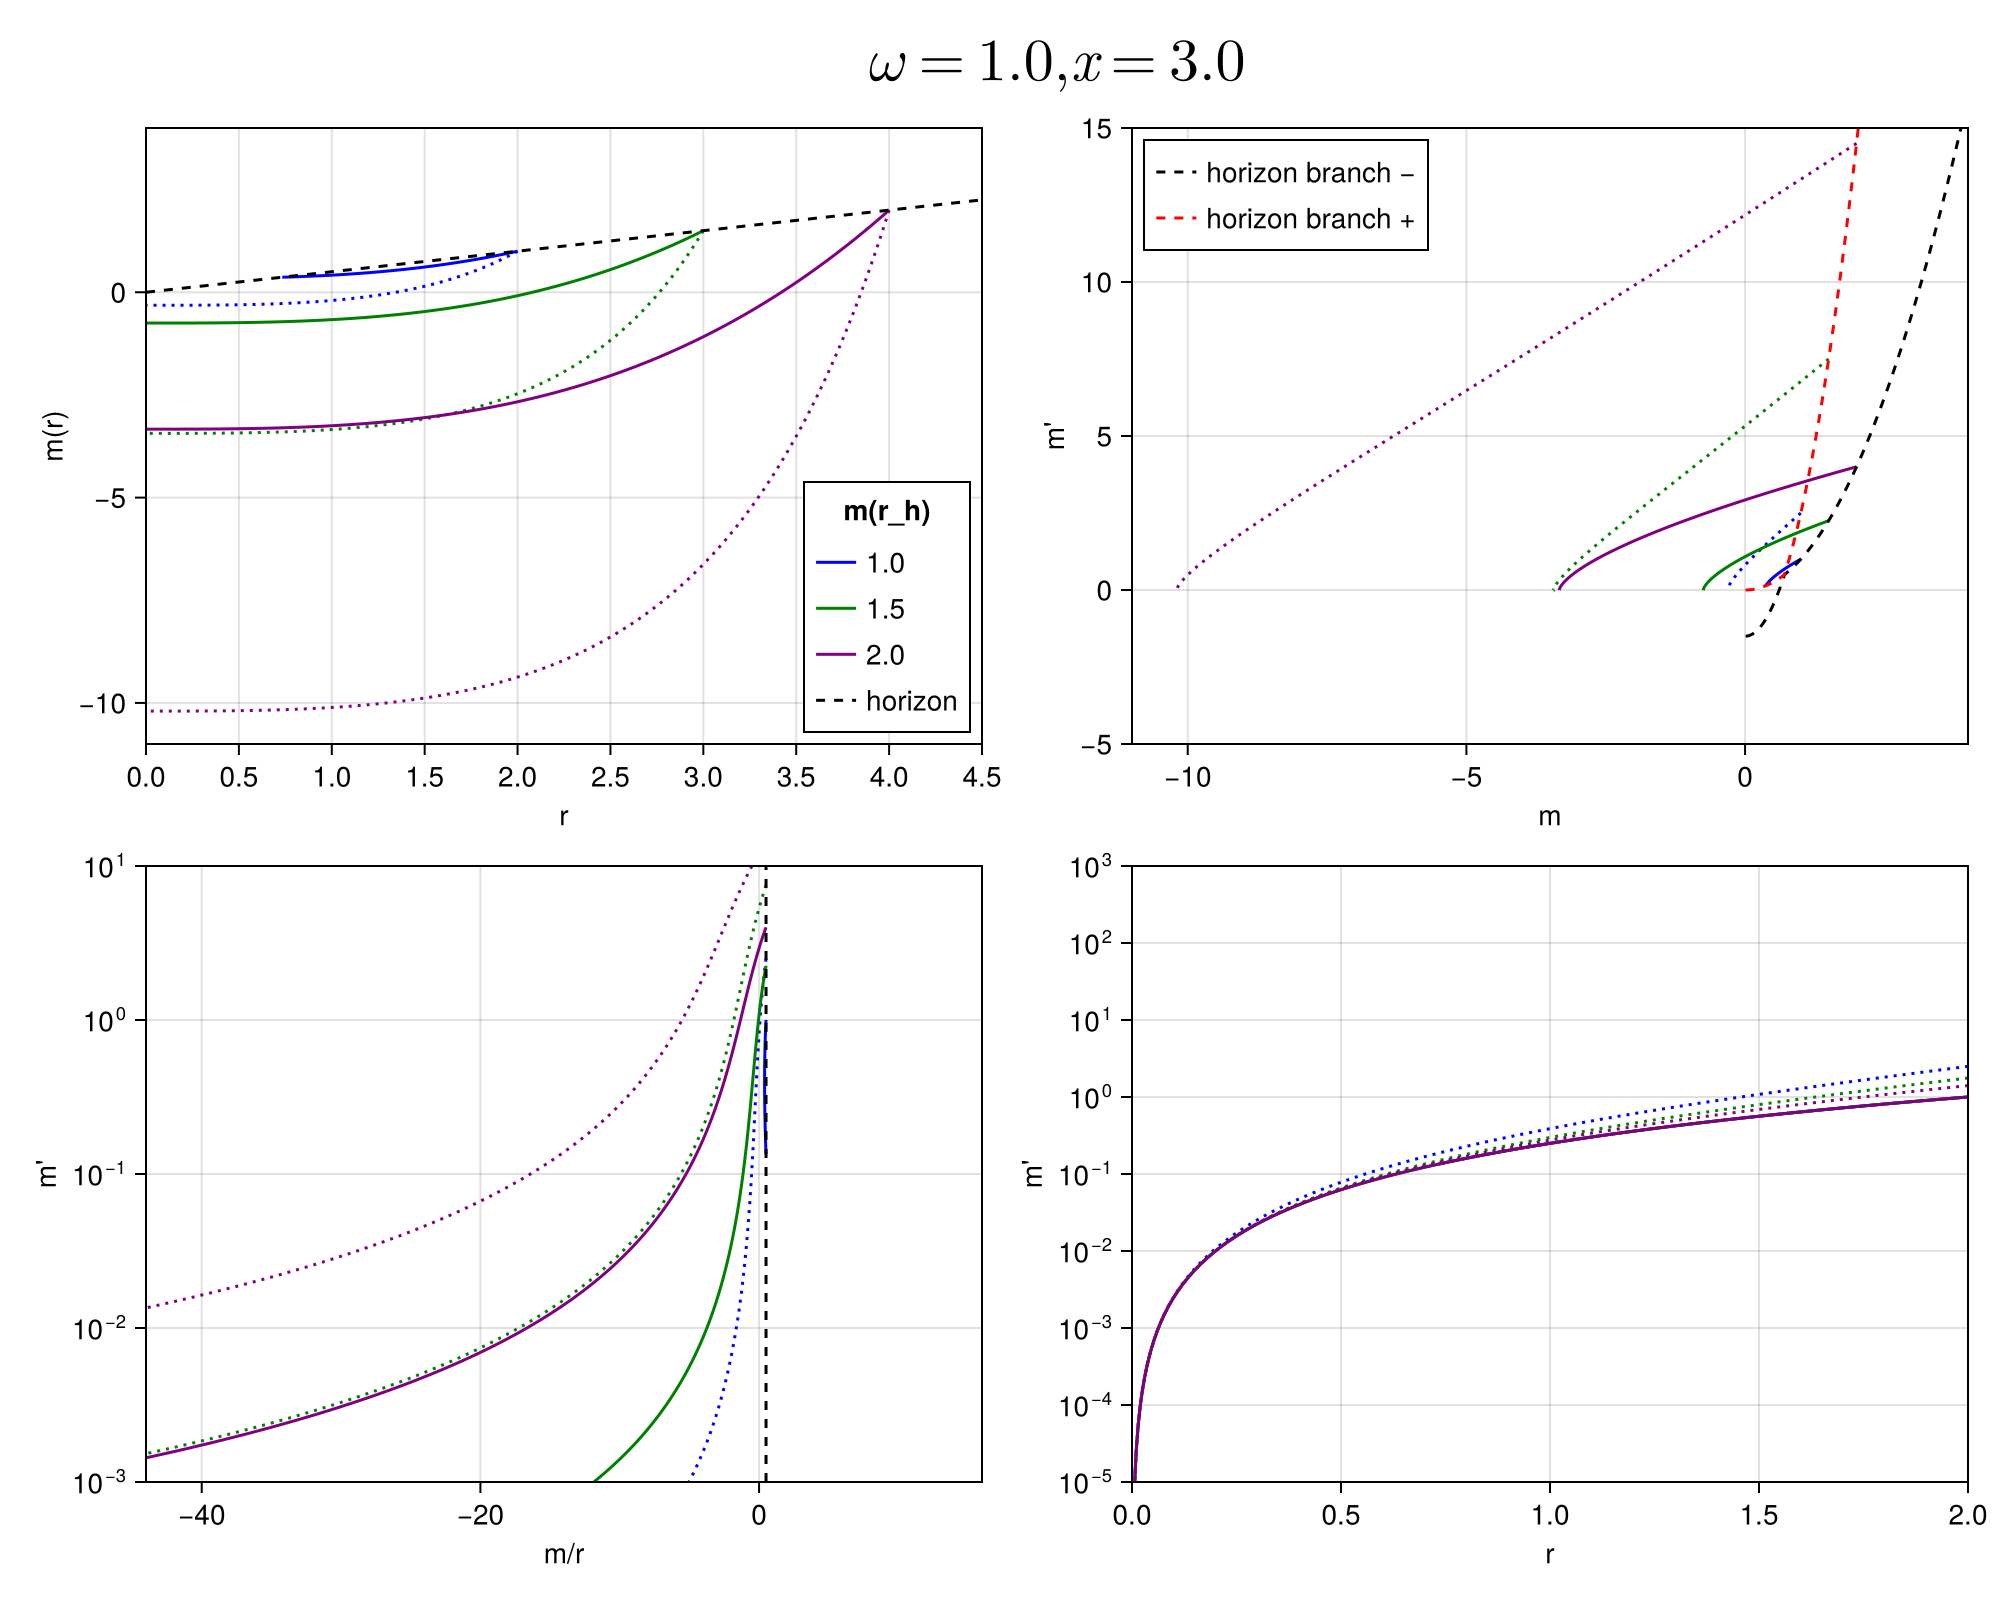

[ Info: Saved in admissible_crossing_high_om1.0_x3.0.pdf


In [64]:

# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------
fig = Figure(size = (1000, 800))
ax_rm = Axis(
    fig[1,1],
    xlabel = "r",
    ylabel = "m(r)",
    limits = (
        (0,4.5), 
        (-11, 4)
    ),
)
ax_phase = Axis(
    fig[1,2],
    xlabel = "m",
    ylabel = "m'",
    limits = (
        (-11, 4), 
        (-5,15)
    )
)
ax_phase_scaled = Axis(
    fig[2,1],
    xlabel = "m/r",
    ylabel = "m'",
    yscale = log10,
    limits = (
        (-44, 16.0),
        (1e-3,1e1)
        )
)

ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    yscale = log10,
    limits = (
        (0,2),
        (1e-5,1e3)
    )
)

MH = [1.0,1.5,2.0]

# ------------------------------------------------------------
# Run shooting
# ------------------------------------------------------------
ls = (:solid,:dot)
colors = (:blue, :green, :purple)
for (ih,mh) in enumerate(MH)
    solutions = shoot_to_origin(mh)
    for (i,(mp_h, sol)) in enumerate(solutions)
        @show mp_h
        label = i==1 ? "$(mh)" : nothing
        lines!(ax_rm, sol.t, sol[1,:],linestyle=ls[i],color = colors[ih], label = label)
        lines!(ax_phase, sol[1,:], sol[2,:],linestyle=ls[i],color = colors[ih])
        lines!(ax_phase_scaled, sol[1,:] ./ sol.t, sol[2,:],linestyle=ls[i],color = colors[ih])
        lines!(ax_deriv, sol.t, sol[2,:],linestyle=ls[i],color = colors[ih])
    end
end
    
r_horizon = range(rspan[1],7.0,100)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")
vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")
   
axislegend(ax_rm,"m(r_h)", position=:rb)

# horizon in phase plot
ms = range(0.01, 5.0; length=400)

mprime_plus  = Float64[]
mprime_minus = Float64[]
ms_valid     = Float64[]

for m in ms
    slopes = admissible_slopes(m, x, w)
    slopes === Float64[] && continue

    push!(ms_valid, m)
    push!(mprime_minus, slopes[1])
    push!(mprime_plus,  slopes[2])
end
lines!(ax_phase, ms_valid, mprime_minus;
       linestyle = :dash, color = :black,
       label = "horizon branch −")

lines!(ax_phase, ms_valid, mprime_plus;
       linestyle = :dash, color = :red,
       label = "horizon branch +")

axislegend(ax_phase, position=:lt)
Label(fig[0, :], LaTeXStrings.latexstring("\\omega = $(w), x = $(x)"), fontsize = 30)

display(fig)
filename = "admissible_crossing_high_om$(w)_x$(x).pdf"
save(filename, fig)
@info "Saved in $(filename)"

mh = 0.1

┌ Warning: At t=1.2199011611406674, dt was forced below floating point epsilon -1.9982058782640168e-16, and step error estimate = 1.001258967446252. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671
┌ Warning: At t=0.8645249310121892, dt was forced below floating point epsilon -9.988685045732911e-17, and step error estimate = 1.0042836015476777. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/4MHGc/src/integrator_interface.jl:671



mp_h = -1.4600000000000002
mp_h = 0.010000000000000009
mh = 0.5
mp_h = -0.5
mp_h = 0.25
mh = 0.8
mp_h = 0.6399999999999998
mp_h = 1.0600000000000005
mh = 0.95
mp_h = 0.9024999999999995
mp_h = 2.1100000000000003


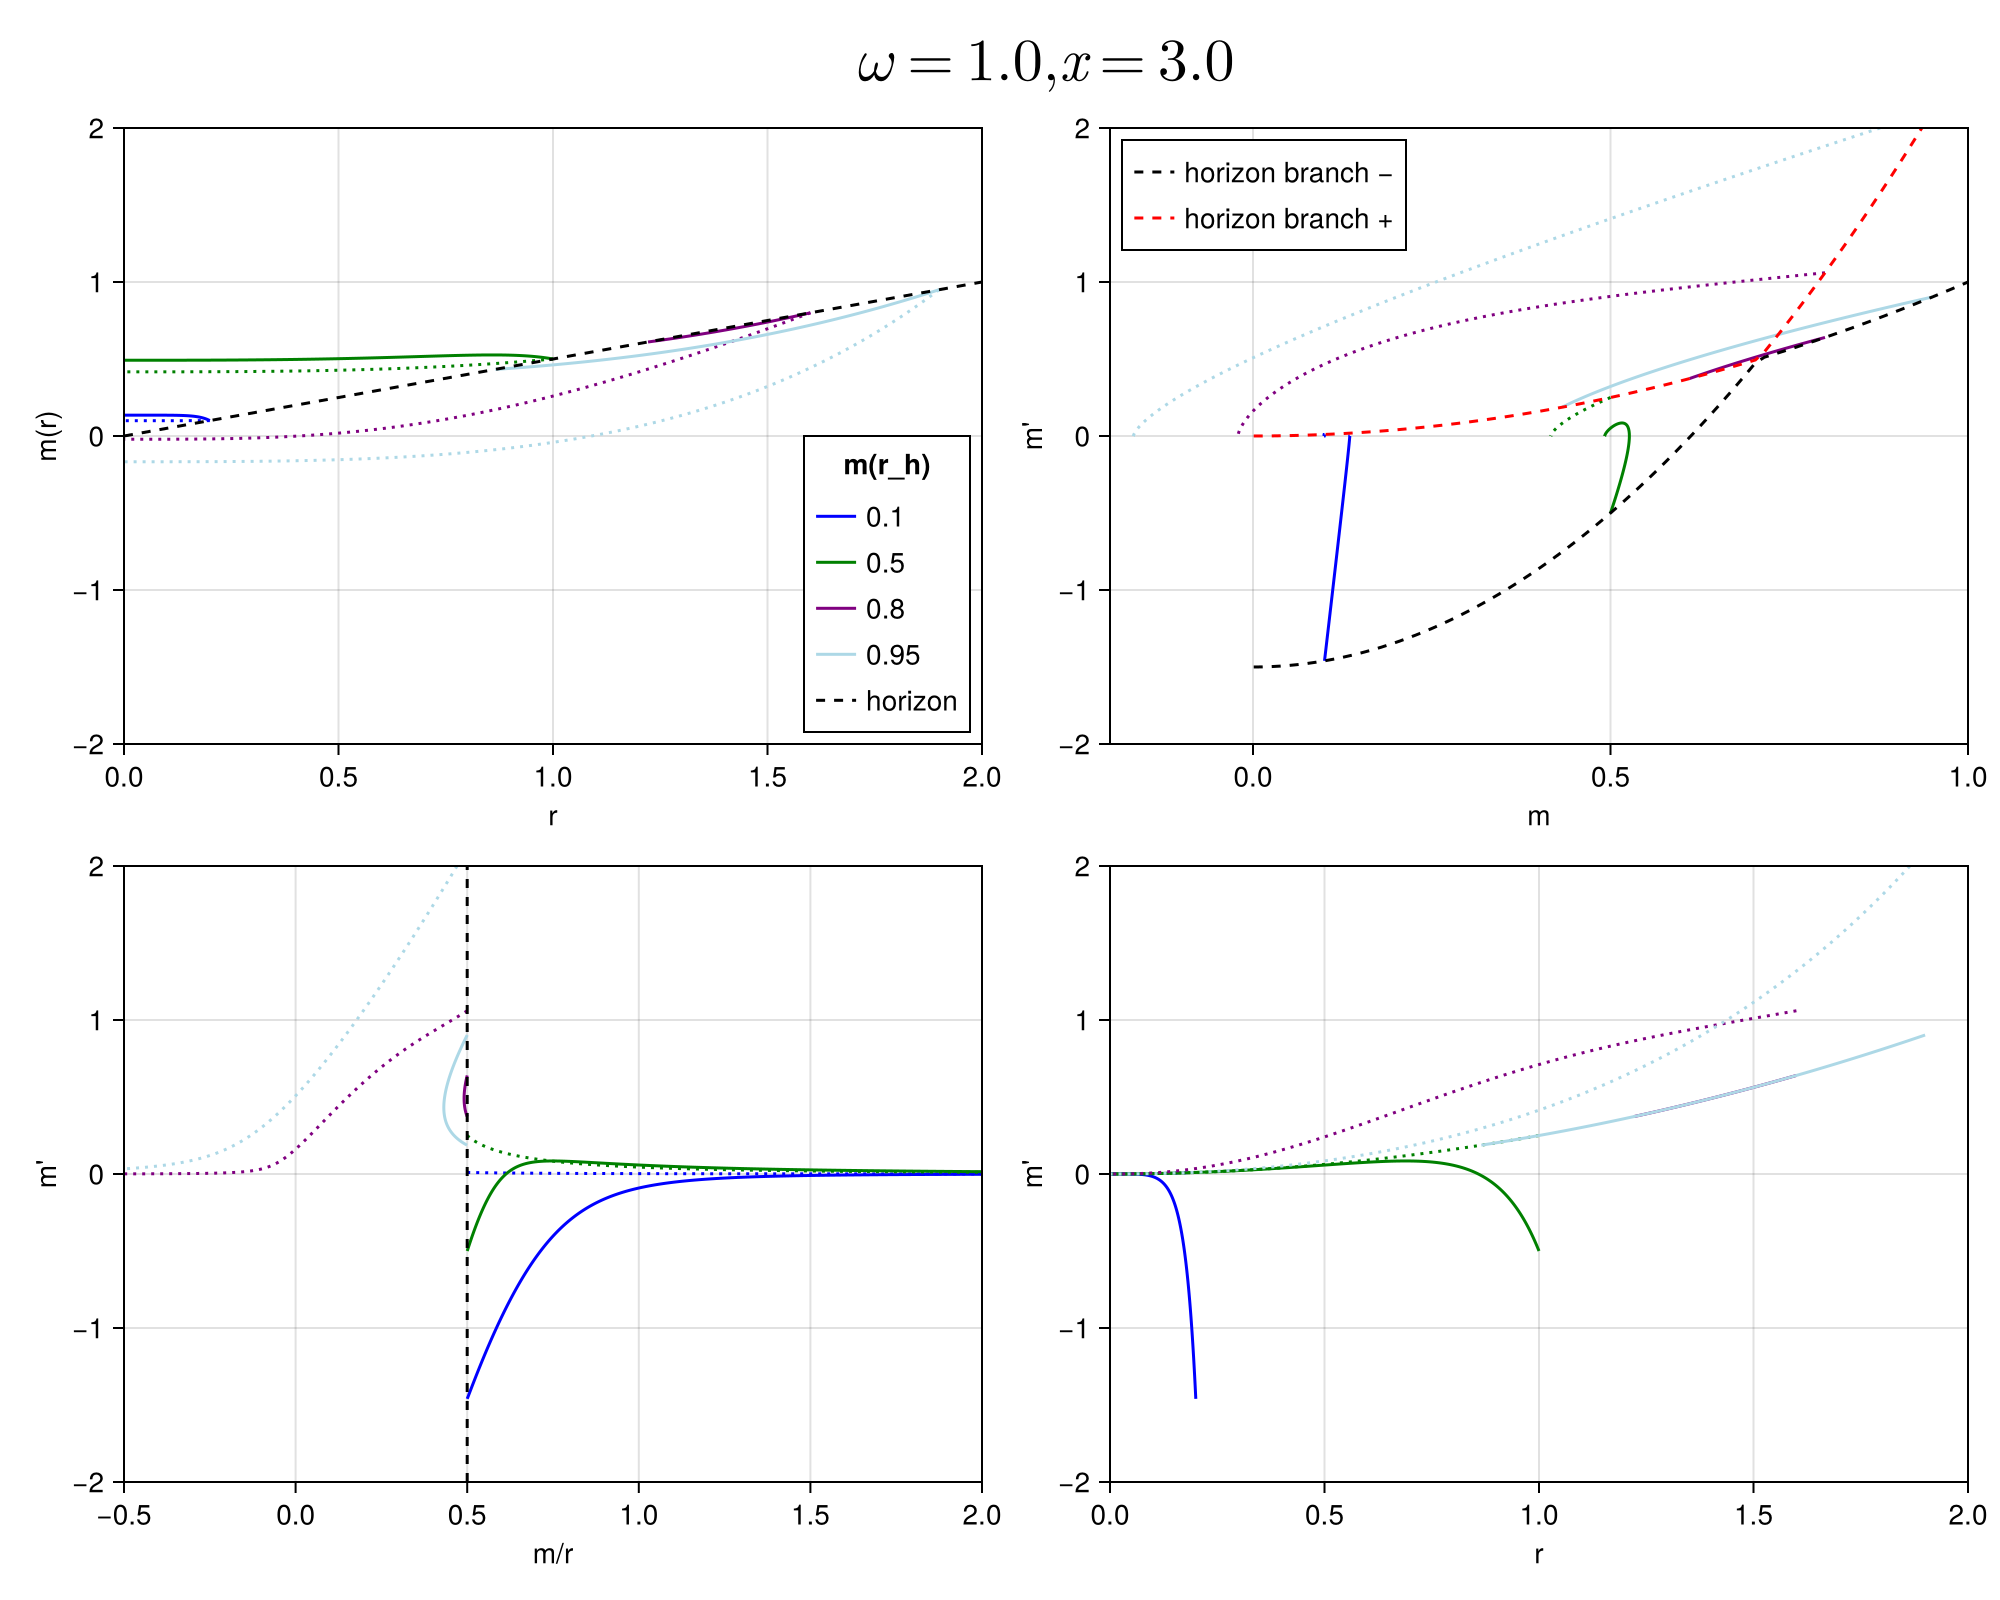

[ Info: Saved in admissible_crossing_low_om1.0_x3.0.pdf


In [65]:

# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------
fig = Figure(size = (1000, 800))
ax_rm = Axis(
    fig[1,1],
    xlabel = "r",
    ylabel = "m(r)",
    limits = (
        (0,2), 
        (-2, 2)
    ),
)
ax_phase = Axis(
    fig[1,2],
    xlabel = "m",
    ylabel = "m'",
    limits = (
        (-0.2,1), 
        (-2,2)
    )
)
ax_phase_scaled = Axis(
    fig[2,1],
    xlabel = "m/r",
    ylabel = "m'",
    #yscale = log10,
    limits = (
        (-0.5, 2.0),
        (-2,2)
        )
)
ax_deriv = Axis(
    fig[2, 2],
    xlabel = "r",
    ylabel = "m'",
    #yscale = Makie.Symlog10(-1e-10,1e2),
    #yscale = log10,
    limits = (
        (0,2),
        (-2,2)
    )
)
MH = [0.1,0.5,0.8,0.95]
#MH = [0.1,0.5,0.8,0.71]

# ------------------------------------------------------------
# Run shooting
# ------------------------------------------------------------
ls = (:solid,:dot)
colors = (:blue, :green, :purple, :lightblue)
for (ih,mh) in enumerate(MH)
    @show mh
    solutions = shoot_to_origin(mh)
    for (i,(mp_h, sol)) in enumerate(solutions)
        
        @show mp_h
        label = i==1 ? "$(mh)" : nothing
        lines!(ax_rm, sol.t, sol[1,:],linestyle=ls[i],color = colors[ih], label = label)
        lines!(ax_phase, sol[1,:], sol[2,:],linestyle=ls[i],color = colors[ih])
        lines!(ax_phase_scaled, sol[1,:] ./ sol.t, sol[2,:],linestyle=ls[i],color = colors[ih])
        lines!(ax_deriv, sol.t, sol[2,:],linestyle=ls[i],color = colors[ih])
    end
end
    
r_horizon = range(rspan[1],7.0,100)
m_horizon = r_horizon ./ 2
lines!(ax_rm, r_horizon, m_horizon, linestyle = :dash, color=:black,label = "horizon")
vlines!(ax_phase_scaled, 0.5, color = :black, linestyle = :dash,label="horizon")
   
axislegend(ax_rm,"m(r_h)", position=:rb)

# horizon in phase plot
ms = range(0.001, 5.0; length=400)

mprime_plus  = Float64[]
mprime_minus = Float64[]
ms_valid     = Float64[]

for m in ms
    slopes = admissible_slopes(m, x, w)
    slopes === Float64[] && continue

    push!(ms_valid, m)
    push!(mprime_minus, slopes[1])
    push!(mprime_plus,  slopes[2])
end
lines!(ax_phase, ms_valid, mprime_minus;
       linestyle = :dash, color = :black,
       label = "horizon branch −")

lines!(ax_phase, ms_valid, mprime_plus;
       linestyle = :dash, color = :red,
       label = "horizon branch +")

axislegend(ax_phase, position=:lt)
Label(fig[0, :], LaTeXStrings.latexstring("\\omega = $(w), x = $(x)"), fontsize = 30)

display(fig)
filename = "admissible_crossing_low_om$(w)_x$(x).pdf"
save(filename, fig)
@info "Saved in $(filename)"